In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('bank_marketing_data.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
#checking shape, datatype, and whether data set has null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
target       4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
None


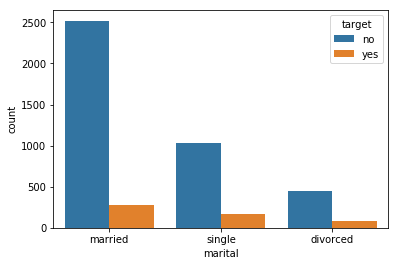

In [25]:
#compare differences in married status
sns.countplot(x='marital',hue='target',data=df)

Text(0.5,1,'Duration')

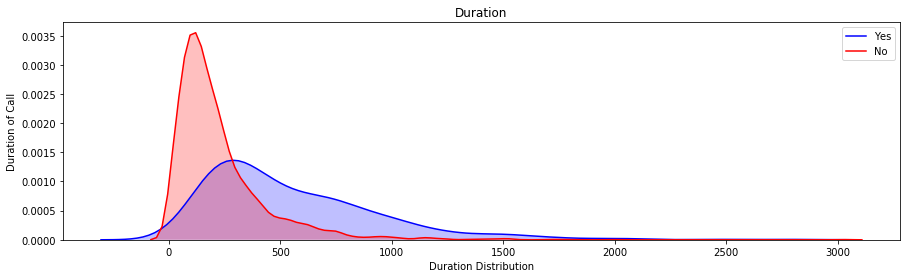

In [31]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['target'] == 'yes'),'duration'] , color='b',shade=True,label='Yes')
ax=sns.kdeplot(df.loc[(df['target'] == 'no'),'duration'] , color='r',shade=True, label='No')
ax.set(xlabel='Duration Distribution', ylabel='Duration of Call')
plt.title('Duration')


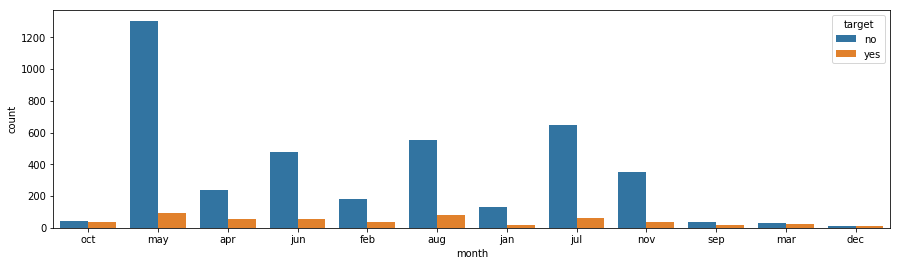

In [34]:
#count of responses per month
plt.figure(figsize=(15,4))
sns.countplot(x='month',hue='target',data=df)

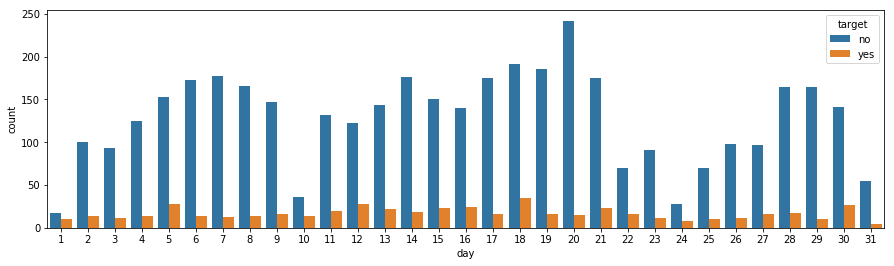

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(x='day',hue='target',data=df)

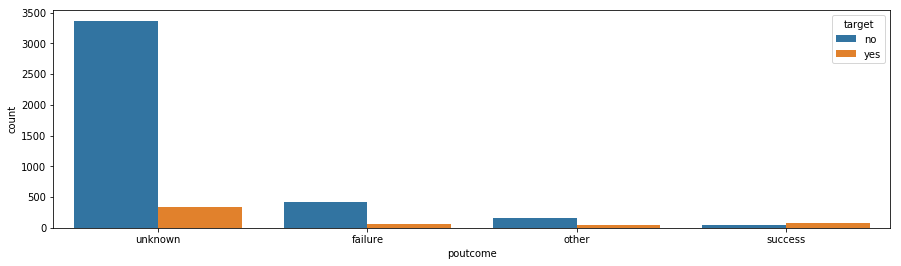

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(x='poutcome',hue='target',data=df)

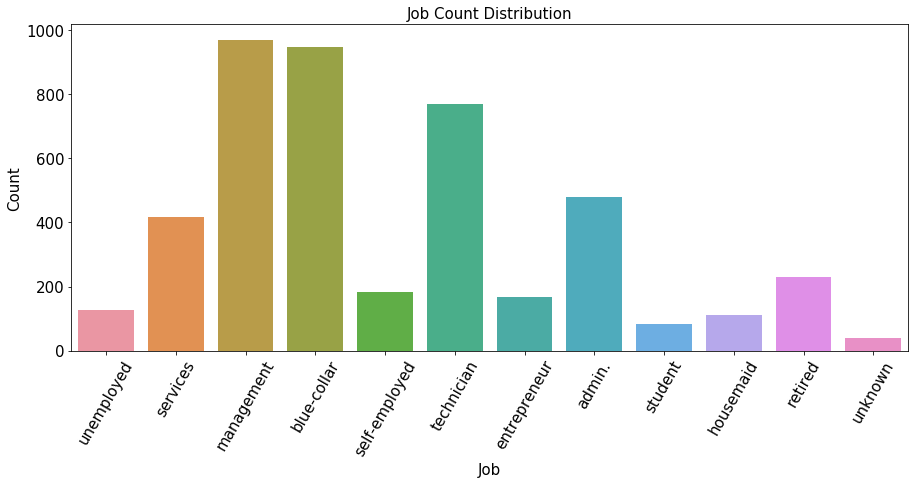

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
plt.xticks(rotation=60)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

In [ ]:
Data split into:
Client data
Marketing data
Economic index data

In [96]:
client_df = df[['age', 'job', 'marital', 'education', 'default', 'housing','loan']]
marketing_df = df[['contact', 'month','day','duration','campaign','pdays','previous','poutcome']]

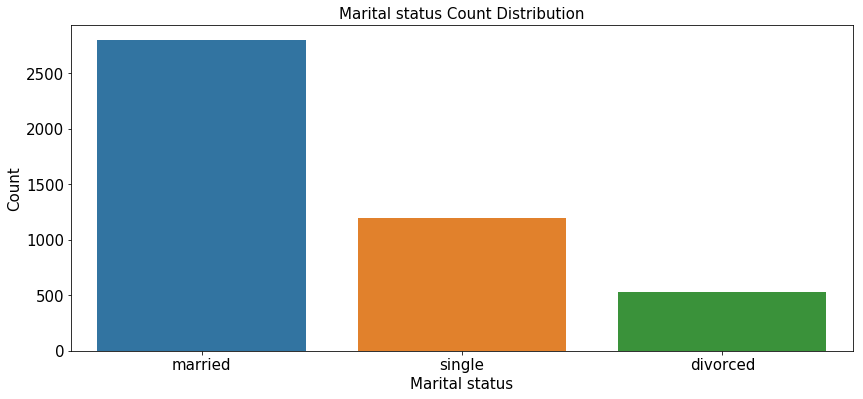

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.countplot(x = 'marital', data = client_df)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

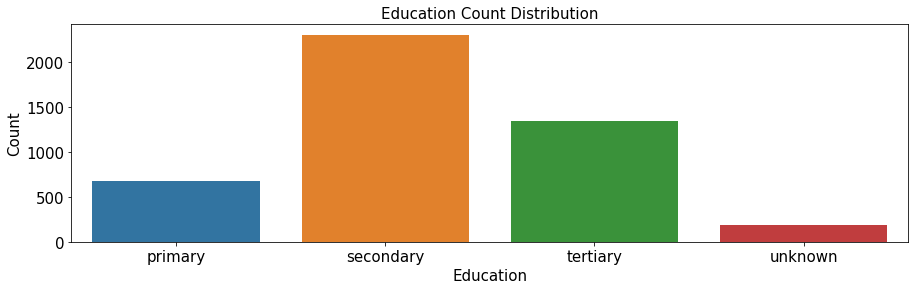

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.countplot(x = 'education', data = client_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

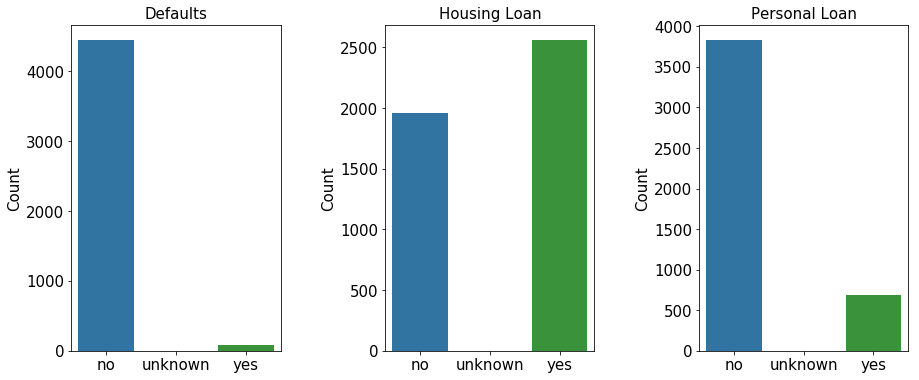

In [88]:
# Is credit in default 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x = 'default', data = client_df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Defaults', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Has housing loan ?
sns.countplot(x = 'housing', data = client_df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Has Personal loan ?
sns.countplot(x = 'loan', data = client_df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)

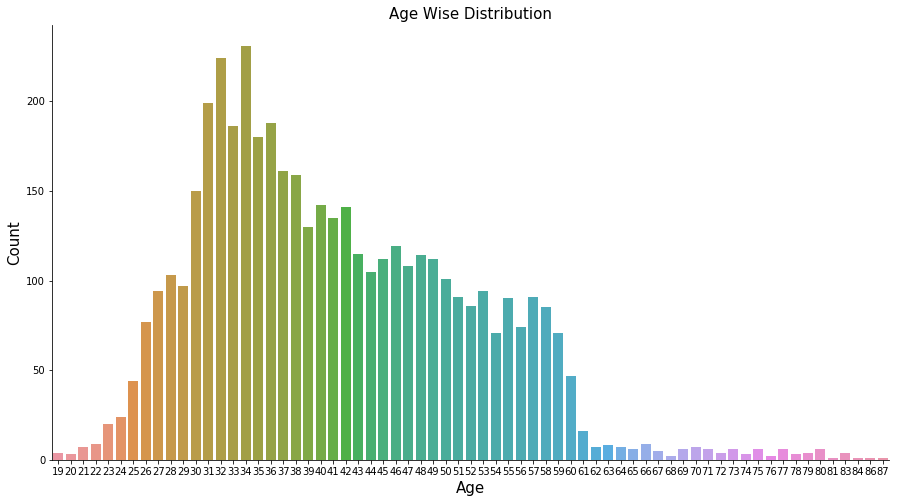

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'age', data = client_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Wise Distribution', fontsize=15)
sns.despine()

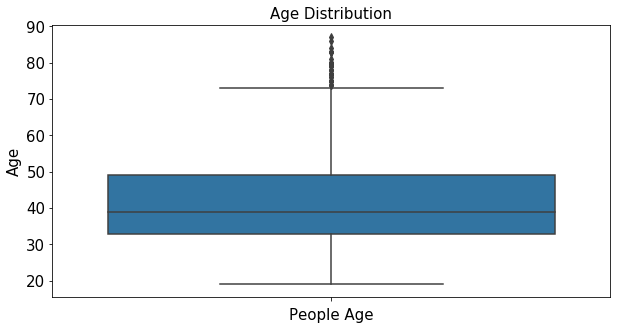

In [90]:
#checking age outliers
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'age', data = client_df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

In [94]:
# checking other details of age
client_df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [108]:
# functions to create bucketing in age
def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age']=4
           
    return df

age(client_df);

//anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [109]:
# convert categorical data to numerical values using one hot encoding 
client_df=pd.get_dummies(client_df)
client_df.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,3,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


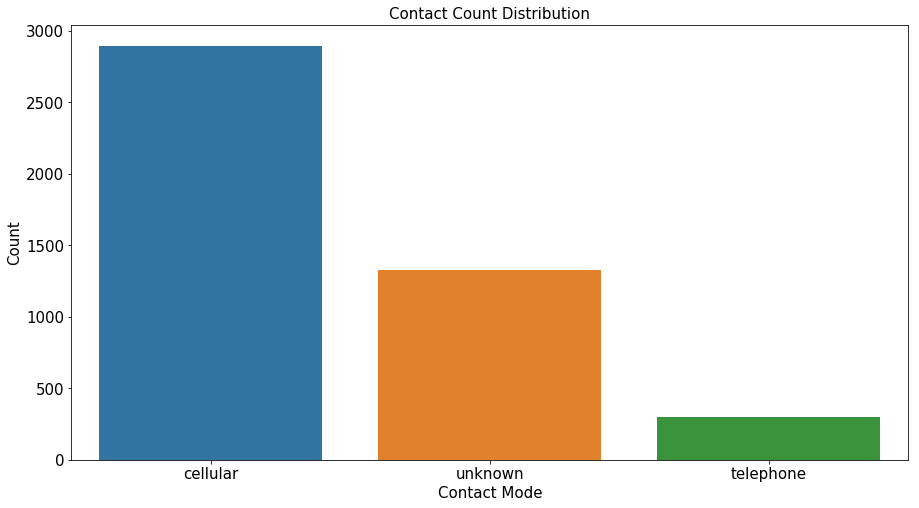

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'contact', data = marketing_df)
ax.set_xlabel('Contact Mode', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

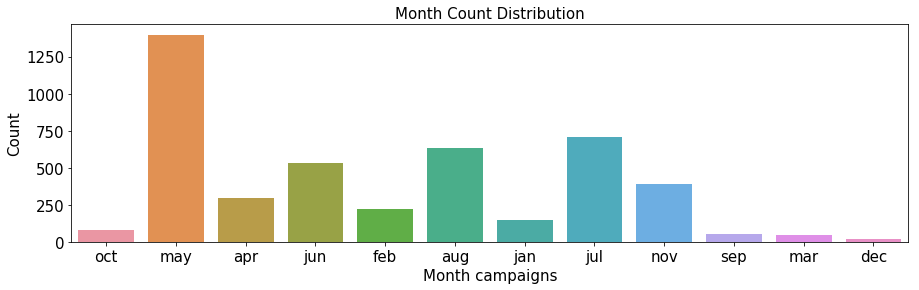

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.countplot(x = 'month', data = marketing_df)
ax.set_xlabel('Month campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

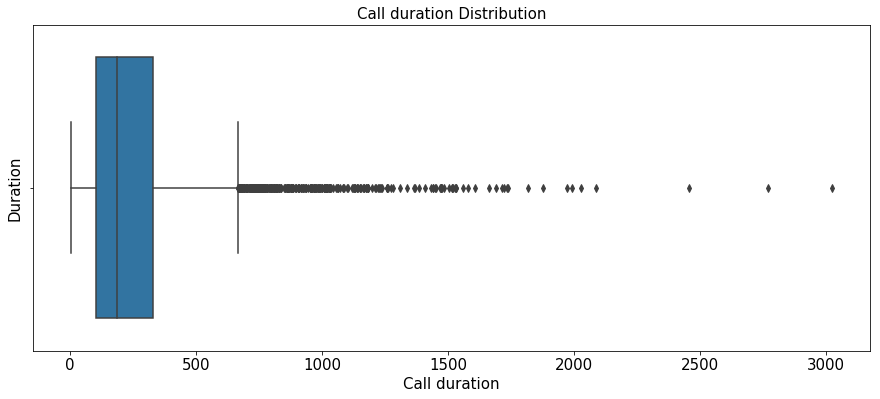

In [104]:
#duration column

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 6))
sns.boxplot(x = 'duration', data = marketing_df, orient = 'h', ax = ax1)
ax1.set_xlabel('Call duration', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Call duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

In [107]:
marketing_df['duration'].describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

In [110]:
#bucketing duration 
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(marketing_df).head()

,contact,month,day,duration,campaign,pdays,previous,poutcome
0,cellular,oct,19,1,1,-1,0,unknown
1,cellular,may,11,3,1,339,4,failure
2,cellular,apr,16,3,1,330,1,failure
3,unknown,jun,3,3,4,-1,0,unknown
4,unknown,may,5,3,1,-1,0,unknown


In [111]:
enc_mon = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

marketing_df.month=marketing_df.month.map(enc_mon)

//anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [112]:
# convert datatype to int
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


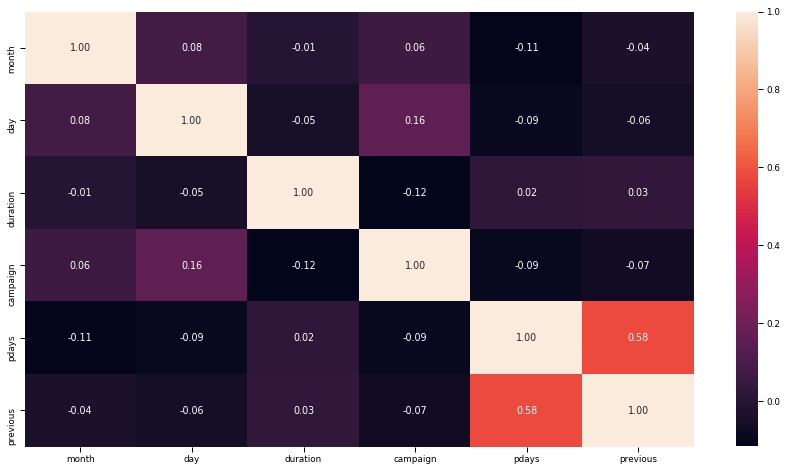

In [121]:
corr=marketing_df.corr()
sns.set_context("paper",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (15,8))
a = sns.heatmap(corr, annot = True, fmt = ".2f")